# Predicting the success of marketing campaigns for financial services

___

## Business understanding

### A marketing campaign to convince prospect to suscribe to a new product: term deposit

A term deposit is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time. 

### Framing the business problem 

Our bank wants to launch a marketing campaign to promote a new term deposit product. The objective of this marketing campaign is to convert the prospect base so they suscribe to this new product. As the database of prospects is large and the marketing budget limited, the bank wants its telesales team to focus on prospects having the highest likelihood to subscribe to this term deposit product.  

** The business unit objective is to leverage data science to maximise the campaign return on investment **

## Data scientist role in this project

Based on previous campaigns outcomes (has the client suscribed or not), as a data scientist, the aim is to investigate the dataset of potential prospects, to get insight from it and to build a model helping the marketing team decide if a prospect should be added to the campaign target group or not. As the data outcome is binary and pre-labelled, supervised learning classification methods can be used to answer the business question: "Will this client subscribe to a term deposit and therefore should this client be included in the next campaign prospects list?"

** The data scientist role is to provide a production-level model to predict subscription **

## Data understanding

In [1]:
import pandas as pd
import numpy as np

# vizualisation
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# models building
from sklearn import preprocessing
# notebook look and feel
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

This dataset provides information about the customer, its engagement history and the status of previous marketing campaigns. It comprises 11162 records and 17 fields.

In [2]:
df = pd.read_csv('bank.csv', header=0)
df = df.dropna()
print(df.shape)
print(list(df.columns))

(11162, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']


### Data dictionary

In [3]:
display(df.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

**client data**

1. age (numeric)
2. job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
3. marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
4. education (categorical: primary, secondary, tertiary and unknown)
5. default: has credit in default? (categorical: “no”, “yes”, “unknown”)
6. balance. Balance of the individual.
7. housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
8. loan: has personal loan? (categorical: “no”, “yes”, “unknown”)

**client-bank last contact data for this marketing campaign (current campaign)**

9. contact: contact communication type (categorical: “cellular”, “telephone”)
10. day: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
11. month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
12. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

**client-bank engagement timeline data (previous marketing campaign)**

14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)

**output/desired target label**
17. **deposit** (binary, 1=Yes, 2=No) is the **target/label**

## Exploratory Data Analysis

### Data description

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


* Mean Age is aproximately 41 years old with a large amplitude from 18 years old to 95 years old
* Balance has a large distribution (high standard deviation)
* Duration features is not relevant to the study as it is retrieved post-call and we want to predict the chance pre-call

### Checking data - Missing data

In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

This dataset has no missing value.

### Univariate data exploration

#### Target variable

We aim to predict if the customer will or not suscribe to a term deposit. The target variable is the deposit status, a binary variable ((binary: “1”, means “Yes”, “0” means “No”). 

In [7]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [8]:
df.groupby('deposit').mean()

,age,balance,day,duration,campaign,pdays,previous
deposit,,,,,,,
no,40.837391,1280.227141,16.108122,223.130257,2.839264,35.685340,0.528350
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


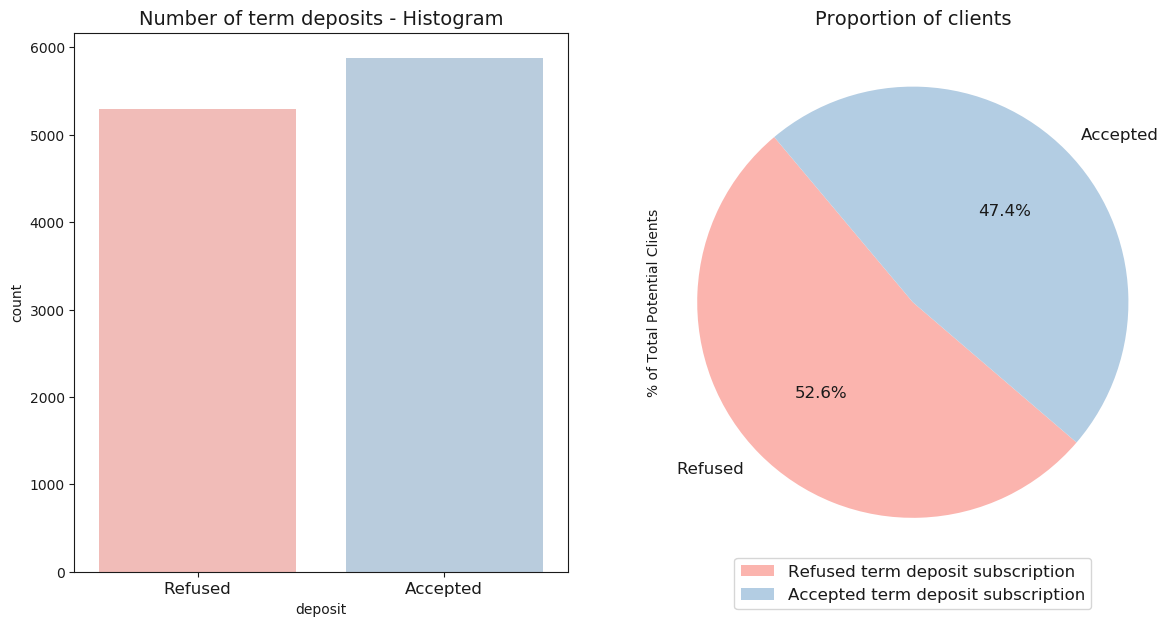

In [9]:
plt.style.use('default')
f,ax=plt.subplots(1,2,figsize=(14,7))
colors=["#fbb4ae", "#b3cde3"]
sns.countplot('deposit',data=df,ax=ax[0], palette=colors)
ax[0].set_title('Number of term deposits - Histogram', fontsize=14)
ax[0].set_xticklabels(['Refused', 'Accepted'], fontsize=12)
labels1 = 'Refused term deposit subscription', 'Accepted term deposit subscription'
labels2 = 'Refused', 'Accepted'
plt.axis('equal')
df['deposit'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],colors=colors, labels=labels2,fontsize=12,startangle=130)
ax[1].set_title('Proportion of clients', fontsize=14)
ax[1].set_ylabel('% of Total Potential Clients', fontsize=10)
plt.legend(labels=labels1,loc="lower center",bbox_to_anchor=(0.5, -0.085),fontsize=12)
plt.savefig('target_deposit')
plt.show()

From this visualisation of our target class:
* 52.6% refused to suscribe to term deposits while 47.4% accepted to suscribe term deposits. 
* Our labels are equally distributed and so our class are balanced for the classification models.

####  Explanatory variables (predictors)

The other variables are potential predictors. Further down in our analysis, we will investigate is they have influence on the outcome and to what extent.

**I-Numerical variables**

In [10]:
# Numeric columns
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
num_cols_with_deposit = num_cols + ['deposit']

In [11]:
df_num_dep = df[num_cols_with_deposit]
df_num_dep.head()

,age,balance,day,duration,campaign,pdays,previous,deposit
0,59,2343,5,1042,1,-1,0,yes
1,56,45,5,1467,1,-1,0,yes
2,41,1270,5,1389,1,-1,0,yes
3,55,2476,5,579,1,-1,0,yes
4,54,184,5,673,2,-1,0,yes


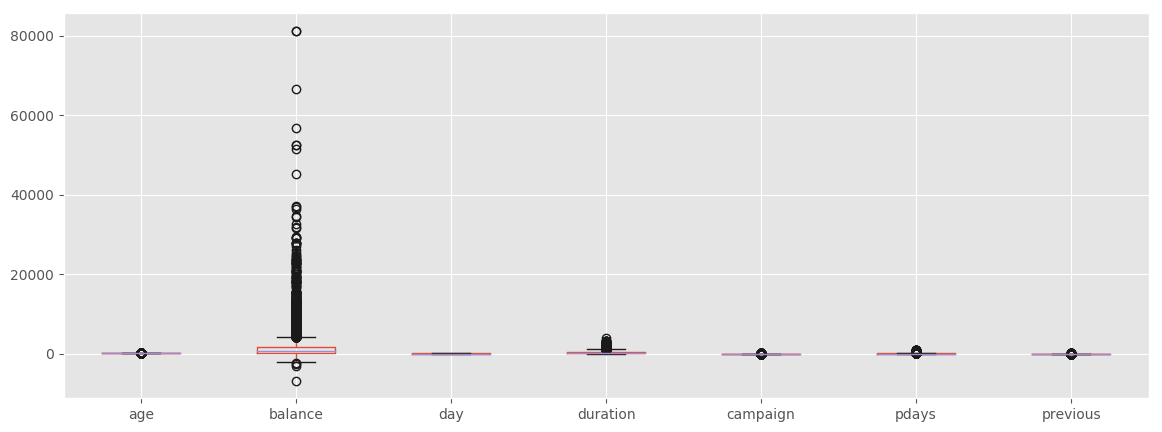

In [12]:
plt.style.use('ggplot')
df_num_dep.boxplot(figsize=(14,5))

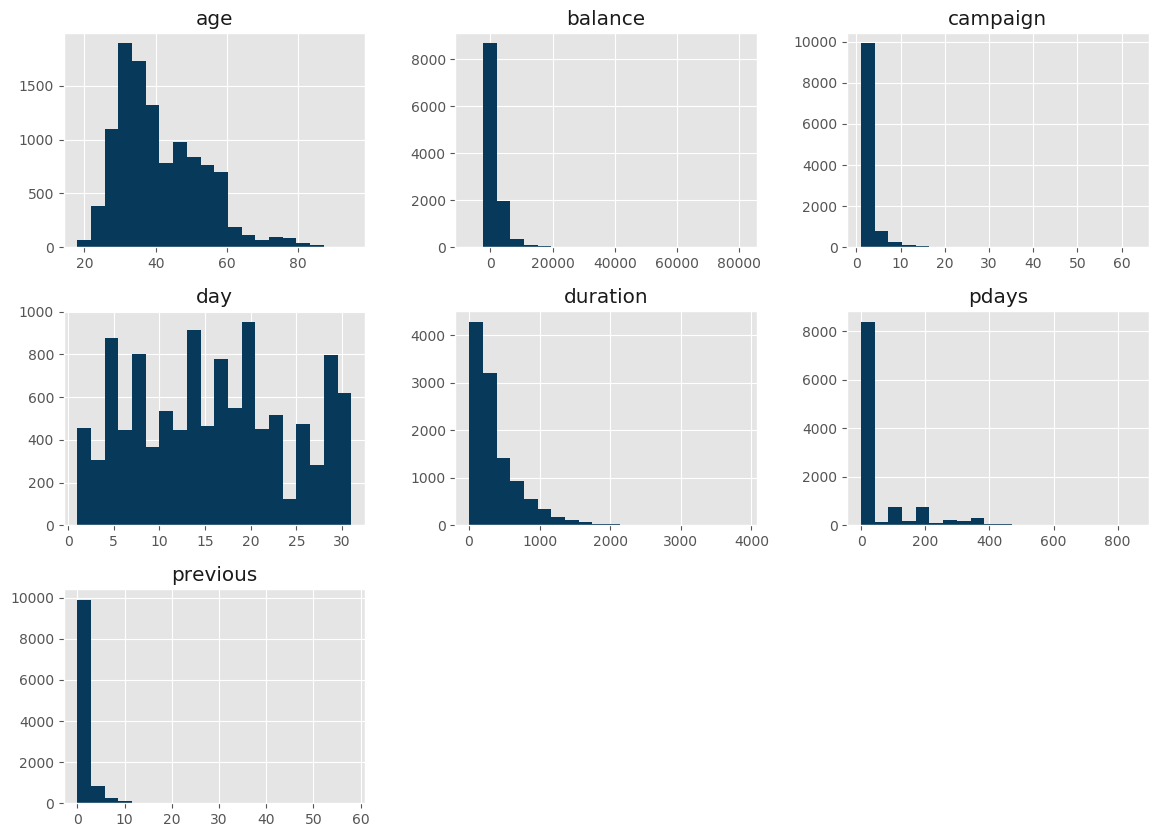

In [13]:
plt.style.use('ggplot')
df_num_dep.hist(bins=20, figsize=(14,10),  color='#073a5a')
plt.show()

**Age**

In [14]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

[Text(0.5,0,'')]

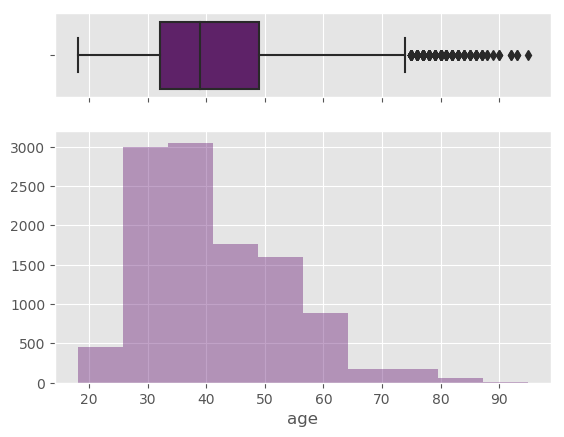

In [15]:
# Cut the window in 2 parts
plt.style.use('ggplot')
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .9)})
# Add a graph in each part
sns.boxplot(df_num_dep["age"], ax=ax_box,color='#661773')
sns.distplot(df_num_dep["age"], ax=ax_hist,color='#661773', bins=10,kde=False)
 # Remove x axis name for the boxplot
ax_box.set(xlabel='')

From 30 to 50 years old is the core of the customer database

** Balance**

[Text(0.5,0,'')]

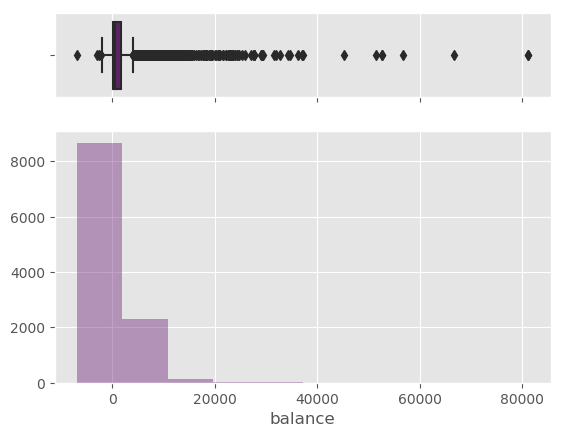

In [16]:
# Cut the window in 2 parts
plt.style.use('ggplot')
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .9)})
# Add a graph in each part
sns.boxplot(df_num_dep["balance"], ax=ax_box,color='#661773')
sns.distplot(df_num_dep["balance"], ax=ax_hist,color='#661773',bins=10,kde=False)
 
 # Remove x axis name for the boxplot
ax_box.set(xlabel='')

** Campaign**

[Text(0.5,0,'')]

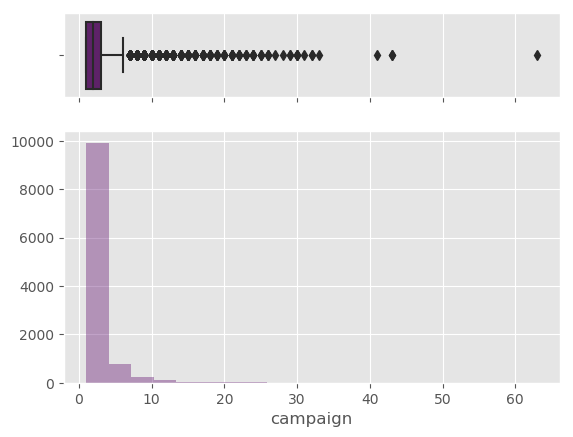

In [17]:
# Cut the window in 2 parts
plt.style.use('ggplot')
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .9)})
# Add a graph in each part
sns.boxplot(df_num_dep["campaign"], ax=ax_box,color='#661773')
sns.distplot(df_num_dep["campaign"], ax=ax_hist,color='#661773',bins=20,kde=False)
 
 # Remove x axis name for the boxplot
ax_box.set(xlabel='')

** Client-bank last contact data for this marketing campaign (current campaign) **

[Text(0.5,0,'')]

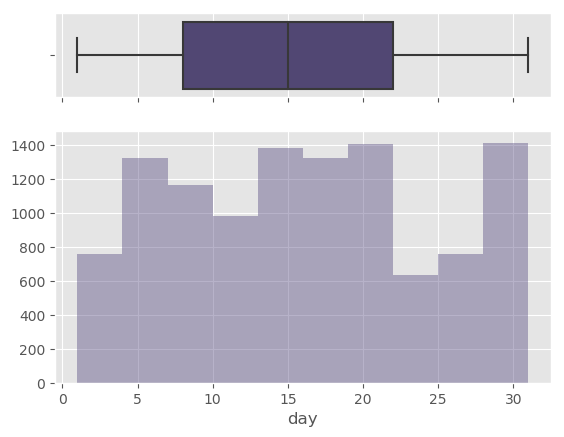

In [18]:
# Cut the window in 2 parts
plt.style.use('ggplot')
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .9)})
# Add a graph in each part
sns.boxplot(df_num_dep["day"], ax=ax_box,color='#4d407a')
sns.distplot(df_num_dep["day"], ax=ax_hist,color='#4d407a',bins=10,kde=False)
 
 # Remove x axis name for the boxplot
ax_box.set(xlabel='')

[Text(0.5,0,'')]

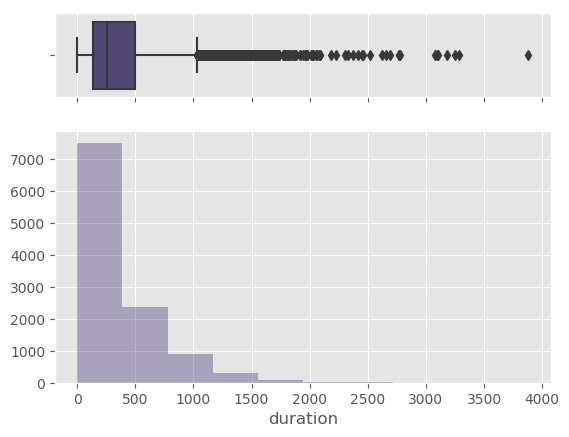

In [19]:
# Cut the window in 2 parts
plt.style.use('ggplot')
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .9)})
# Add a graph in each part
sns.boxplot(df_num_dep["duration"], ax=ax_box,color='#4d407a')
sns.distplot(df_num_dep["duration"], ax=ax_hist,color='#4d407a',bins=10,kde=False)
 
 # Remove x axis name for the boxplot
ax_box.set(xlabel='')

** Engagement timeline - previous campaign - pdays**

[Text(0.5,0,'')]

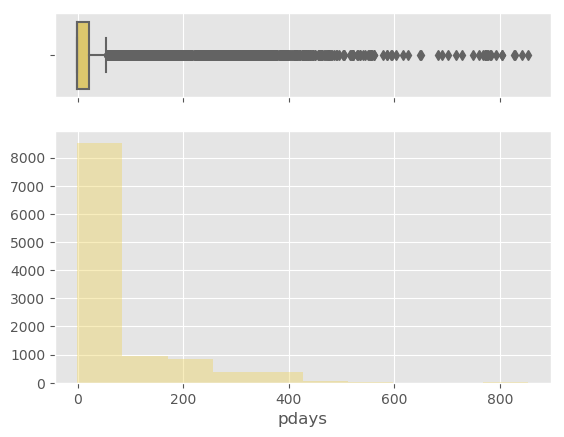

In [20]:
# Cut the window in 2 parts
plt.style.use('ggplot')
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .9)})
# Add a graph in each part
sns.boxplot(df_num_dep["pdays"], ax=ax_box,color='#efd35a')
sns.distplot(df_num_dep["pdays"], ax=ax_hist,color='#efd35a',bins=10,kde=False)
 
 # Remove x axis name for the boxplot
ax_box.set(xlabel='')

** Engagement timeline - previous campaign - previous**

[Text(0.5,0,'')]

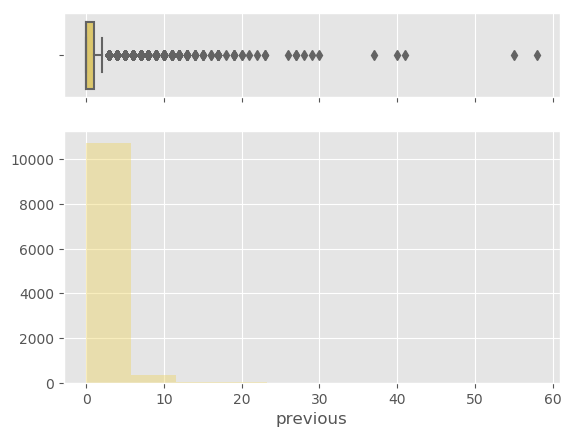

In [21]:
# Cut the window in 2 parts
plt.style.use('ggplot')
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .9)})
# Add a graph in each part
sns.boxplot(df_num_dep["previous"], ax=ax_box,color='#efd35a')
sns.distplot(df_num_dep["previous"], ax=ax_hist,color='#efd35a',bins=10,kde=False)
 
 # Remove x axis name for the boxplot
ax_box.set(xlabel='')

**II-Categorical variables**

**Customer job distribution**

In [22]:
df.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,39.374063,1195.866567,15.340330,347.929535,2.376312,64.338831,0.973763
blue-collar,39.505144,1203.926440,15.235597,394.658951,2.541152,44.061214,0.633230
entrepreneur,42.887195,1621.942073,15.442073,370.182927,2.725610,32.746951,0.536585
housemaid,47.445255,1366.160584,16.364964,348.346715,2.689781,33.540146,0.503650
management,40.218239,1793.663679,15.792284,361.482073,2.588075,54.456352,0.925175
retired,65.424165,2417.250643,15.519280,389.993573,2.131105,53.003856,0.994859
self-employed,39.809877,1865.372840,15.938272,396.155556,2.533333,45.039506,0.804938
services,38.141928,1081.171181,15.728061,385.955580,2.576381,51.546046,0.684724
student,26.102778,1500.783333,15.175000,330.672222,2.169444,68.683333,1.297222


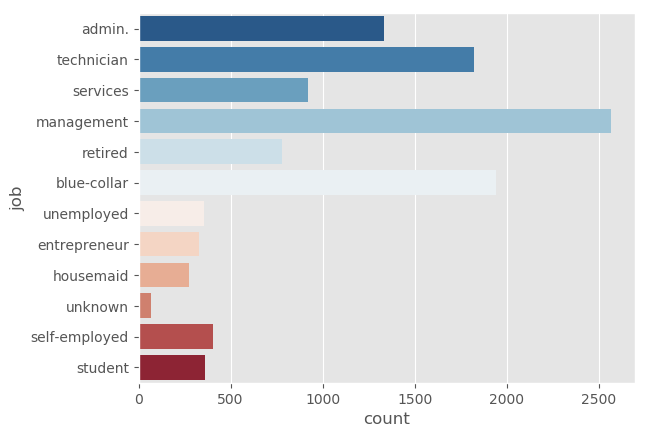

In [23]:
plt.style.use('ggplot')
sns.countplot(y="job", data=df,palette="RdBu_r")
plt.show()

**Customer marital status**

In [24]:
df.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous
marital,,,,,,,
divorced,47.365043,1371.835267,15.689869,392.481825,2.457077,46.651199,0.664346
married,44.533617,1599.927570,15.678791,361.063769,2.621477,49.505432,0.822233
single,33.017339,1457.255259,15.608869,384.195566,2.323195,56.344798,0.913019


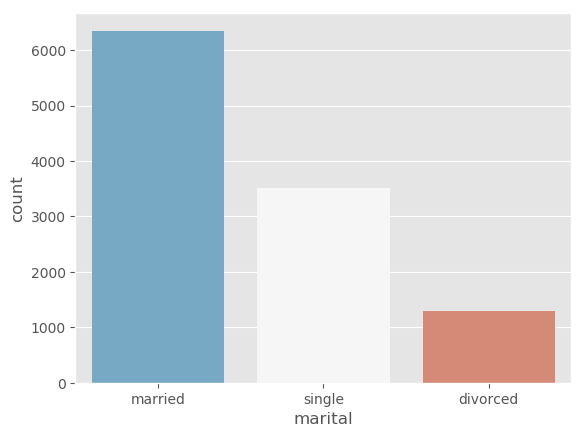

In [25]:
plt.style.use('ggplot')
sns.countplot(x="marital", data=df,palette="RdBu_r")
plt.show()

**Customer education**

In [26]:
df.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous
education,,,,,,,
primary,48.220667,1523.031333,15.510667,383.803333,2.646000,39.976667,0.688000
secondary,40.086012,1296.480278,15.568846,373.344960,2.470051,53.302045,0.821768
tertiary,39.513147,1845.869070,15.782597,368.627812,2.487395,53.120629,0.924370
unknown,45.523139,1746.605634,16.160966,346.448692,2.672032,50.585513,0.706237


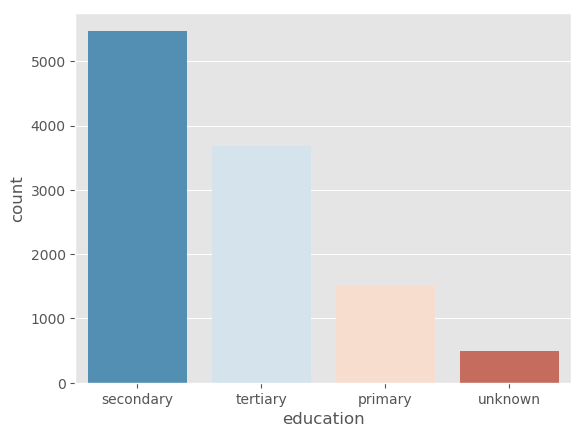

In [27]:
plt.style.use('ggplot')
sns.countplot(x="education", data=df,palette="RdBu_r")
plt.show()

In [28]:
df['education'].unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

** Credit Bureau Information **

In this category, are grouped 3 variables:

* default tag
* housing loan
* personal loan

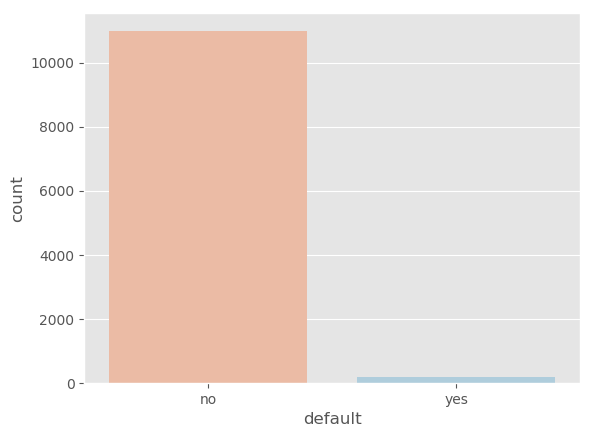

In [29]:
plt.style.use('ggplot')
sns.countplot(x="default", data=df,palette="RdBu")
plt.show()

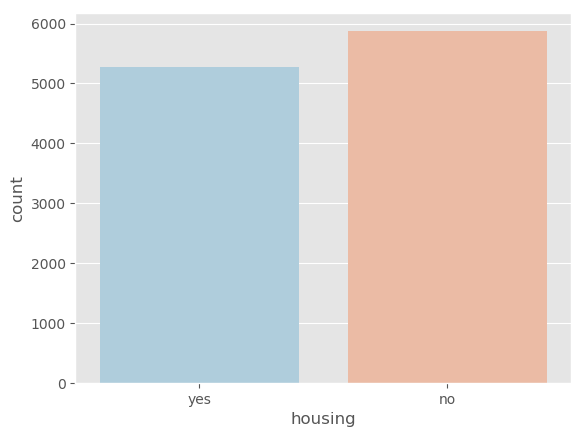

In [30]:
plt.style.use('ggplot')
sns.countplot(x="housing", data=df,palette="RdBu_r")
plt.show()

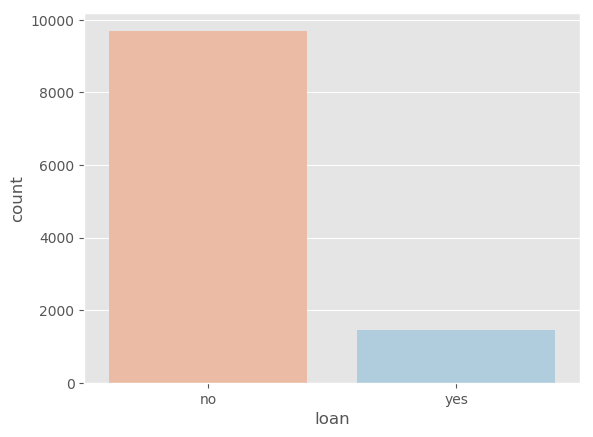

In [31]:
plt.style.use('ggplot')
sns.countplot(x="loan", data=df,palette="RdBu")
plt.show()

#### Previous marketing campaign outcome

One of the variable informs us of the outcome of the previous marketing campaign for this customer.

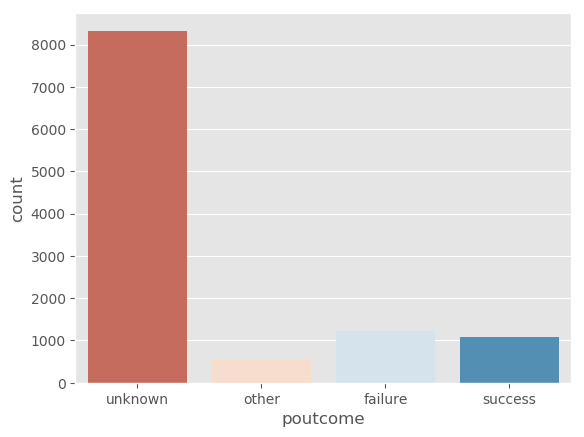

In [32]:
plt.style.use('ggplot')
sns.countplot(x="poutcome", data=df,palette="RdBu")
plt.show()

### Bivariate data exploration

#### Subscription of term deposit per job type

Text(0,0.5,'Subscription')

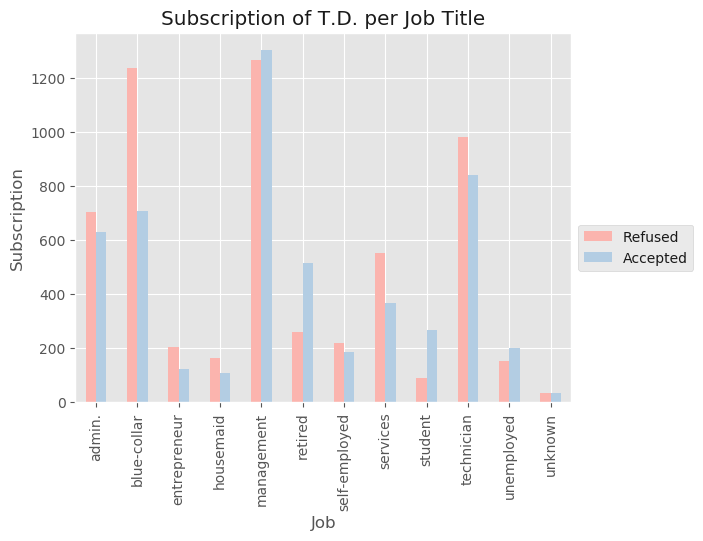

In [33]:
plt.style.use('ggplot')
colors=["#fbb4ae", "#b3cde3"]
pd.crosstab(df.job,df.deposit).plot(kind='bar',colors=colors)
plt.legend(labels=labels2,loc="left",bbox_to_anchor=(1, 0.5),fontsize=10)
plt.title('Subscription of T.D. per Job Title')
plt.xlabel('Job')
plt.ylabel('Subscription')

#### Subscription of term deposit per marital status

Text(0,0.5,'Proportion of Customers per subscription per marital status')

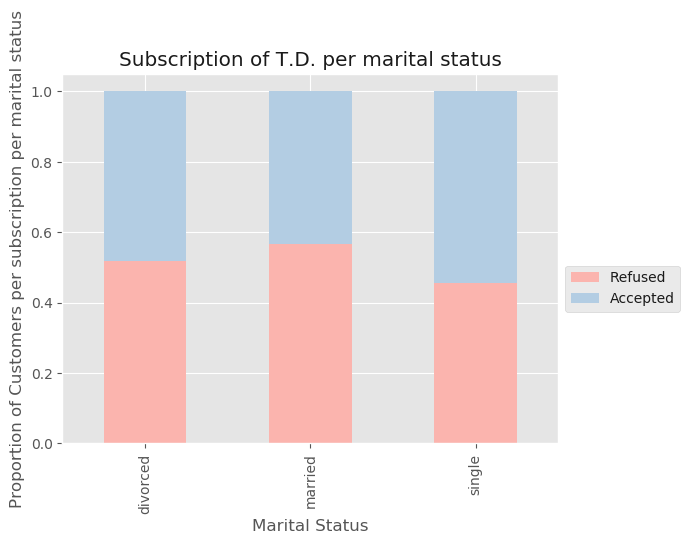

In [34]:
plt.style.use('ggplot')
colors=["#fbb4ae", "#b3cde3"]
table=pd.crosstab(df.marital,df.deposit)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,colors=colors)
plt.legend(labels=labels2,loc="left",bbox_to_anchor=(1, 0.5),fontsize=10)
plt.title('Subscription of T.D. per marital status')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers per subscription per marital status')

#### Subscription of term deposit per education level

Text(0,0.5,'Proportion of Customers per subscription per education level')

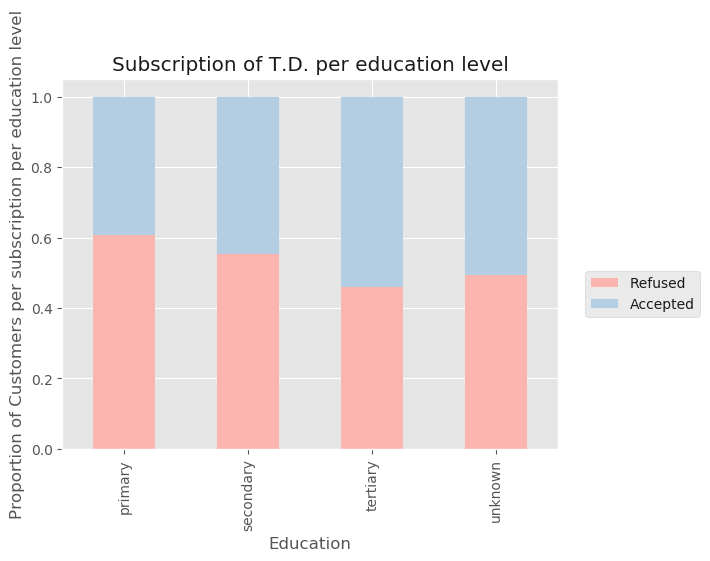

In [35]:
plt.style.use('ggplot')
colors=["#fbb4ae", "#b3cde3"]
table=pd.crosstab(df.education,df.deposit)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,colors=colors)
plt.legend(labels=labels2,loc="left",bbox_to_anchor=(1.3, 0.5),fontsize=10)
plt.title('Subscription of T.D. per education level')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers per subscription per education level')

## Data Preprocessing

### Missing data

No missing data in this dataset but unknown data are present.

### Outliers

We keep the integrity of the original data.

### Create dummy variables from categorical variables and perform one hot encoding

In [36]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [37]:
df2 = pd.get_dummies(df, columns =['job','marital','education','default','housing','loan','contact','month','poutcome'])

In [38]:
df2.head()
df2.columns.values

array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'deposit', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

### Convert target output to binary

In [39]:
df2['deposit'] = df2['deposit'].str.lower().replace({'yes': 1, 'no': 0})

### Drop unknowm columns (TEST)

In [40]:
#print(list(df2.columns))

In [41]:
#df2.drop(['job_unknown','education_unknown','contact_unknown','poutcome_unknown'], axis=1, inplace=True)
#df2.columns
#df2.columns.values

## Features engineering

### Variables and target

Feature selection is a process to select the features contributing the most to the prediction variable here accepting a deposit. The aim of this step is to:
* reduce overfitting: input in the model, relevant predictors and not noise,
* improves accuracy: focus the training of the model with relevant input,
* reduces training time: reduce training processing time by having less dimensions to train on.

In [42]:
# Numeric columns
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

### Univariate Selection - Pairwise relationships between the features

In [43]:
#### Distribution and correlation of the numeric variables

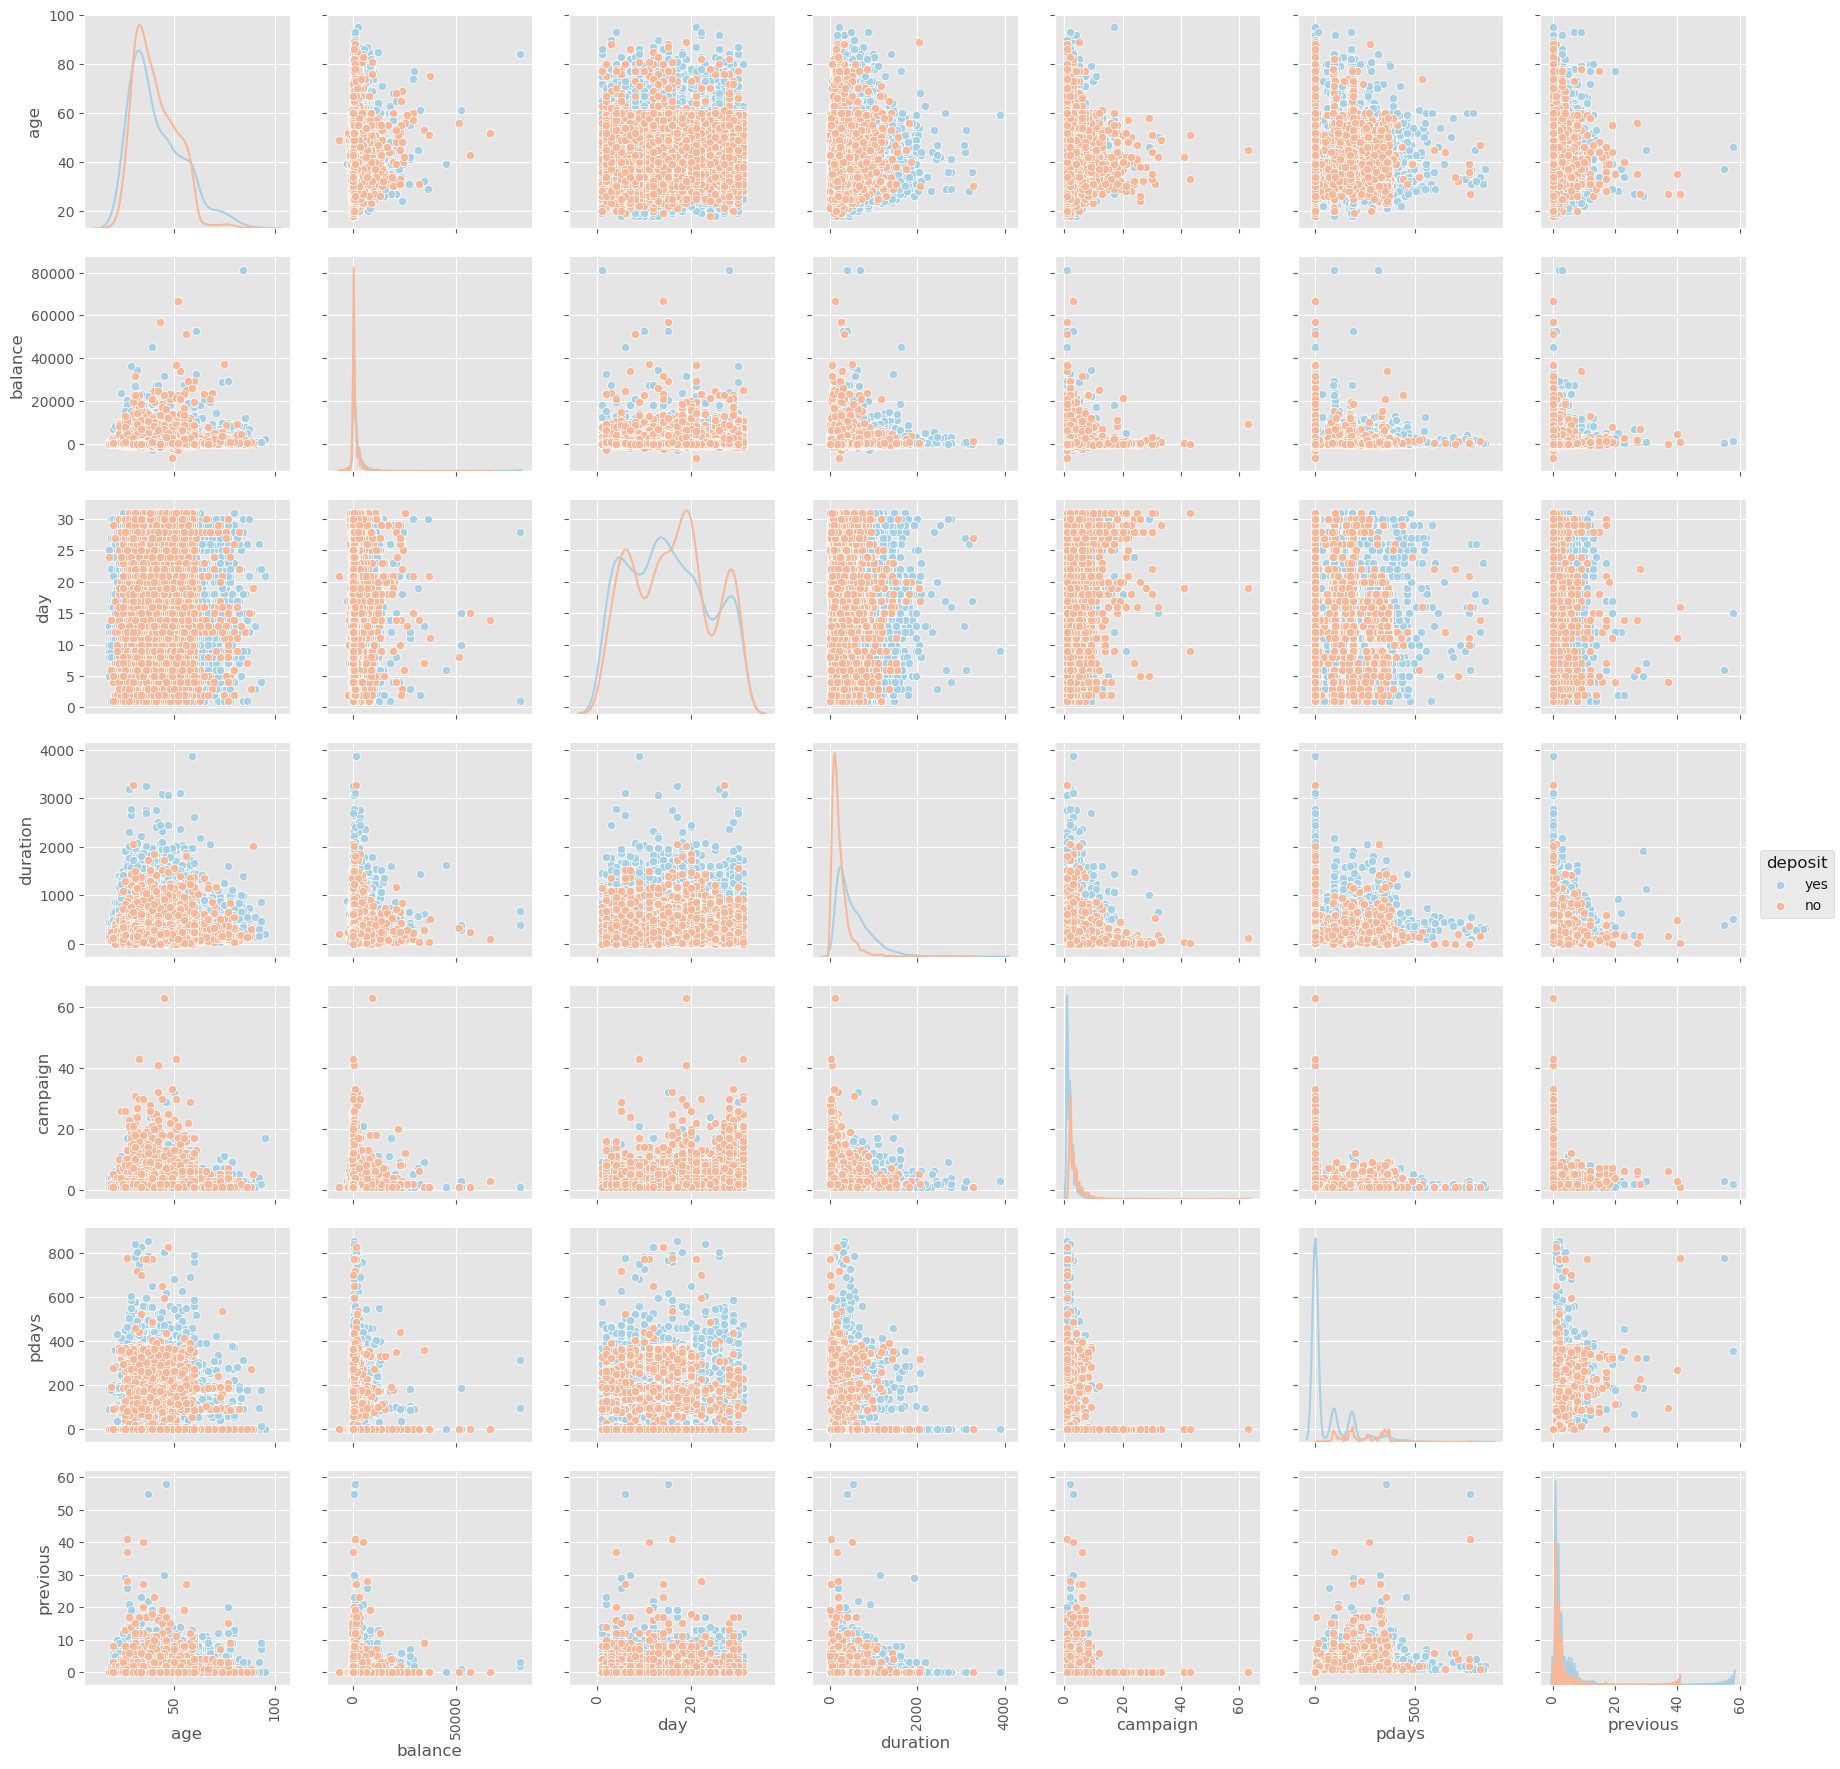

In [44]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
np.seterr(divide='ignore', invalid='ignore')
####
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
num_cols_with_deposit = num_cols + ['deposit']
g = sns.pairplot(df[num_cols_with_deposit], hue = 'deposit', dropna=True,diag_kind = "kde",kind = "scatter",palette="RdBu_r")
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=90) 
g.set(alpha=0.5)
#g.fig.suptitle('Pairwise relationships',fontsize=34,color="r",alpha=0.3)
plt.show()



### Univariate Selection - Pearson Correlation

Correlation matrix shows how all of features in the dataset are correlated with each other. For this dataset, we look at:
* Correlation of Age to Term Deposit
* Correlation of Job to Term Deposit
* Correlation of Marital to Term Deposit
* Correlation of Education to Term Deposit
* Correlation of Housing to Term Deposit
* Correlation of Loan to Term Deposit

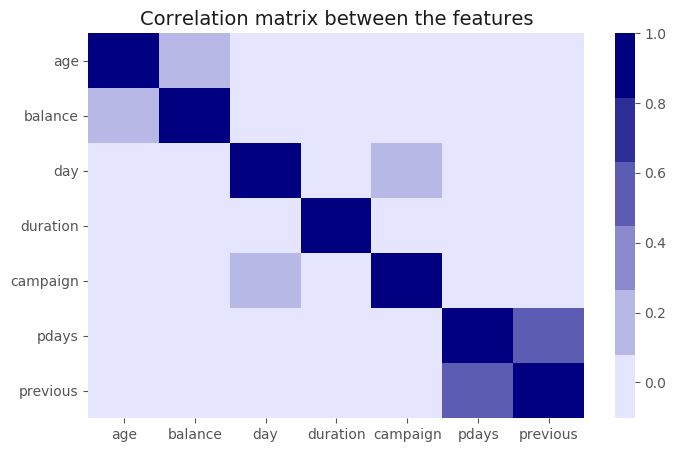

In [45]:
# find the corelation between inputs
corr = df[num_cols_with_deposit].corr()

# plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=sns.light_palette("navy"))
plt.title('Correlation matrix between the features', fontsize=14)
plt.show()

### Recursive feature elimination¶ 

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [46]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
vars_df2=df2.columns.values.tolist()
y=['deposit']
X=[i for i in vars_df2 if i not in y]
rfe = rfe.fit(df2[X], df2[y])

In [47]:
print("Num Features: %d" % rfe.n_features_)

Num Features: 18


In [48]:
# summarize the selection of the attributes
print("Selected Features: %s" % rfe.support_)

Selected Features: [False False False False False False False False False False False False
  True False False  True False False False False False False False False
 False False False False  True False  True False  True False  True False
  True  True  True  True  True False  True  True  True  True  True False
 False  True  True]


In [49]:
print("Feature Ranking: %s" % rfe.ranking_)

Feature Ranking: [32 34 31 28 18 33 24 27 26 14  4 15  1 16 20  1 22  6 12 19  5 29 13 25
  8 23 10 21  1  9  1 11  1  7  1 30  1  1  1  1  1 17  1  1  1  1  1  2
  3  1  1]


                     support  ranking
feature                              
poutcome_unknown        True        1
month_aug               True        1
month_jan               True        1
contact_unknown         True        1
contact_cellular        True        1
loan_no                 True        1
housing_no              True        1
poutcome_success        True        1
month_jul               True        1
month_dec               True        1
job_student             True        1
job_retired             True        1
month_feb               True        1
month_may               True        1
month_nov               True        1
month_sep               True        1
month_oct               True        1
month_mar               True        1
poutcome_failure       False        2
poutcome_other         False        3
job_housemaid          False        4
marital_married        False        5
job_unemployed         False        6
contact_telephone      False        7
education_te

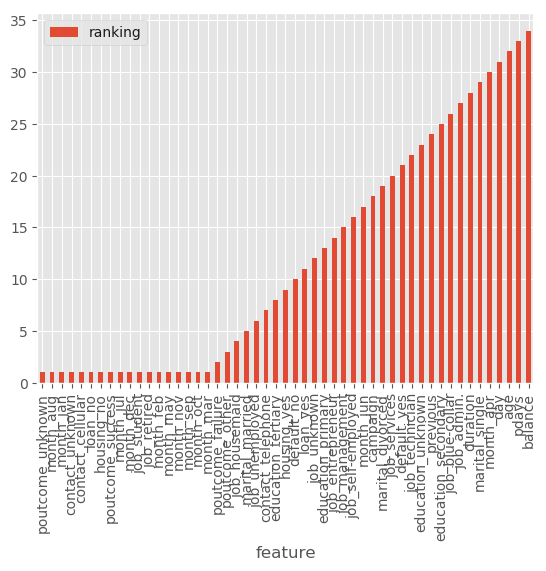

In [50]:
rfe_results = pd.DataFrame({'feature':df2[X].columns,'support':rfe.support_,'ranking':rfe.ranking_})
rfe_results_sort = rfe_results.sort_values('ranking',ascending=True).set_index('feature')
 
print (rfe_results_sort)
rfe_results_sort.plot.bar()

The Recursive Feature Elimination (RFE) has helped us select the following features, marked True in the support_ array and with choice “1” in the ranking_ array,:
* poutcome_unknown 
* month_aug
* month_jan
* contact_unknown
* contact_cellular
* loan_no 
* housing_no
* poutcome_success
* month_jul
* month_dec
* job_student
* job_retired 
* month_feb
* month_may
* month_nov
* month_sep
* month_oct
* month_mar

### Feature Importance

Using an ExtraTreesClassifier, the features importance are extracted.

In [51]:
from sklearn.ensemble import ExtraTreesClassifier
# feature extraction
model = ExtraTreesClassifier()
model.fit(df2[X], df2[y])
print(model.feature_importances_)

[0.07011923 0.07104735 0.07458618 0.24655167 0.04965977 0.01722836
 0.01408629 0.00998706 0.00988605 0.00549448 0.00364392 0.01068199
 0.00727006 0.00578595 0.00853467 0.00561583 0.01157512 0.00525352
 0.00156861 0.00747639 0.01222982 0.01028438 0.00760412 0.01309587
 0.01134818 0.00585936 0.00212809 0.00234587 0.0194678  0.01354466
 0.00505007 0.00965793 0.00810734 0.00568002 0.04436875 0.01164277
 0.0129037  0.00339415 0.00753758 0.0061084  0.00871318 0.01338246
 0.01412657 0.01145593 0.00853792 0.0117771  0.00768457 0.00748648
 0.00533444 0.04193149 0.02115851]


The importance score is given for each attribute: the larger score the more important the attribute. 

                     importance
feature                        
duration                  0.247
day                       0.075
balance                   0.071
age                       0.070
campaign                  0.050
contact_unknown           0.044
poutcome_success          0.042
poutcome_unknown          0.021
housing_no                0.019
pdays                     0.017
housing_yes               0.014
month_mar                 0.014
previous                  0.014
education_secondary       0.013
month_jun                 0.013
month_aug                 0.013
month_apr                 0.012
marital_married           0.012
job_technician            0.012
month_oct                 0.012
month_may                 0.011
job_management            0.011
education_tertiary        0.011
job_admin.                0.010
loan_yes                  0.010
job_blue-collar           0.010
marital_single            0.010
month_jul                 0.009
month_nov                 0.009
job_serv

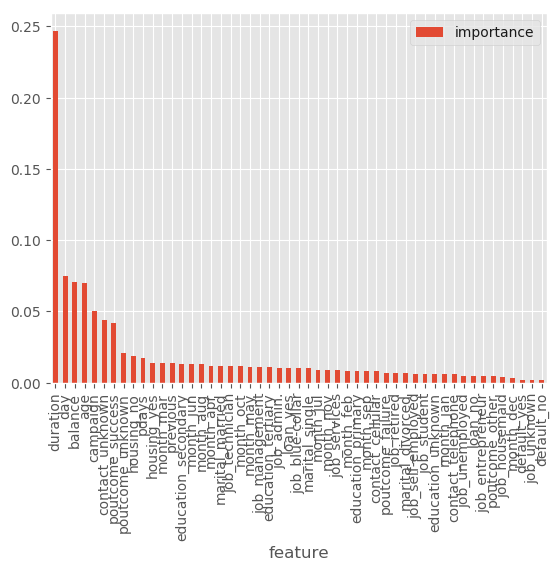

In [52]:
importances = pd.DataFrame({'feature':df2[X].columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
 
print (importances)
importances.plot.bar()

### Features selection summary

Based on the Features Selection output, the predictors for the models phase is narrowed to the following variables:

In [53]:
cols_feat=["poutcome_success","month_aug","month_jan","contact_unknown","contact_cellular",
          "loan_no","housing_no","month_jul","month_dec","job_student","job_retired" ,"month_feb","month_may",
          "month_nov","month_sep","month_oct","month_mar","age","balance","campaign"] 
X=df2[cols_feat]
y=df2['deposit']

## Models

#### Checking the variables significance

Using a logistic regression, we assess the variable significance for the model. As per below, the p-values for the chosen variables are very small which means they are significant to the model.

In [54]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.573771
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.171     
Dependent Variable: deposit          AIC:              12848.8685
Date:               2018-12-06 21:12 BIC:              12995.2739
No. Observations:   11162            Log-Likelihood:   -6404.4   
Df Model:           19               LL-Null:          -7721.6   
Df Residuals:       11142            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
poutcome_success  2.1324   0.1139  18.7197 0.0000  1.9092  2.3557
month_aug        -0.8436   0.0781 -10.7970 0.0000 -0.9967 -0.6904


### Split the data into training and test sets

In [55]:
from sklearn.cross_validation import train_test_split
# 20 percent of dataset is used for test and 80 percent for model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [56]:
# Check out the training and test datasets
print("Size of the training dataset = ", X_train.shape)
print("Size of the testing dataset = ", X_test.shape)
print("\nSample of the training dataset \n")
X_train.head()

Size of the training dataset =  (8929, 20)
Size of the testing dataset =  (2233, 20)

Sample of the training dataset 



,poutcome_success,month_aug,month_jan,contact_unknown,contact_cellular,loan_no,housing_no,month_jul,month_dec,job_student,job_retired,month_feb,month_may,month_nov,month_sep,month_oct,month_mar,age,balance,campaign
6111,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,49,104,1
1149,0,0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,59,514,1
2954,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,33,195,5
2458,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,58,687,1
7504,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,33,1077,3


########################################################################################################################

### Fitting different models: logistic regression, Support Vector Machine, Decision Tree and Random Forest

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier 

In [58]:
# Confusion matrix function helper
import itertools as itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


#### Specify the classifiers to be used

In [59]:
clsr_names=["Nearest Neighbors", "Linear SVM", "RBF SVM",
 "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
 "Naive Bayes","Logistic Regression"]
classifiers = [KNeighborsClassifier(3),
 SVC(kernel="linear", C=0.025), SVC(gamma=2, C=1),
 DecisionTreeClassifier(max_depth=5),
 RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
 MLPClassifier(alpha=1),
 AdaBoostClassifier(),
 GaussianNB(),
 LogisticRegression()]

#### Derive predictor and response variables, and training and testing datasets

In [60]:
cols_feat=["poutcome_unknown","poutcome_success","month_aug","month_jan","contact_unknown","contact_cellular",
           "loan_no","housing_no","month_jul","month_dec","job_student","job_retired" ,"month_feb","month_may",
           "month_nov","month_sep","month_oct","month_mar","day","age","balance","campaign"] 
X=df2[cols_feat]
y=df2['deposit']

#### Train/test split

In [61]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.7, random_state=0)

#### Normalize predictor variables using the min-max scaler

In [62]:
scaler1 = MinMaxScaler()
scaler1.fit(X_train) 
scaler2 = MinMaxScaler()
scaler2.fit(X_test) 
x_trn_n=scaler1.transform(X_train)
x_tst_n=scaler2.transform(X_test) 

### Logistic regression

#### About logistic regression

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

#### Logistic regression assumptions

* Binary logistic regression requires the dependent variable to be binary.
* For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
* Features engineering should be done to narrow the variables to the meaningful predictors
* The model should have little or no multicollinearity ie the variables are assumed to be independent of each other.
* The independent variables are linearly related to the log odds.
* Logistic regression requires quite large sample sizes.

#### Fitting a logistic regression classifier

In [63]:
clf_logreg=classifiers[8]
model_logreg=clf_logreg.fit(x_trn_n,y_train)

#### Predicting the test set results and creating confusion matrix

In [64]:
y_pred_logreg=model_logreg.predict(x_tst_n)
acc2=float((y_pred_logreg==y_test).sum())/float(len(y_test))
print("Logistic Regression accuracy: {0:.3f}%".format(acc2)) 

Logistic Regression accuracy: 0.701%


#### Cross-validation

In [65]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_trn_n,y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.703


#### Confusion matrix of the logistic regression

In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print(confusion_matrix_logreg)

[[3449  698]
 [1640 2027]]


Confusion matrix, without normalization
[[3449  698]
 [1640 2027]]
Normalized confusion matrix
[[0.83 0.17]
 [0.45 0.55]]


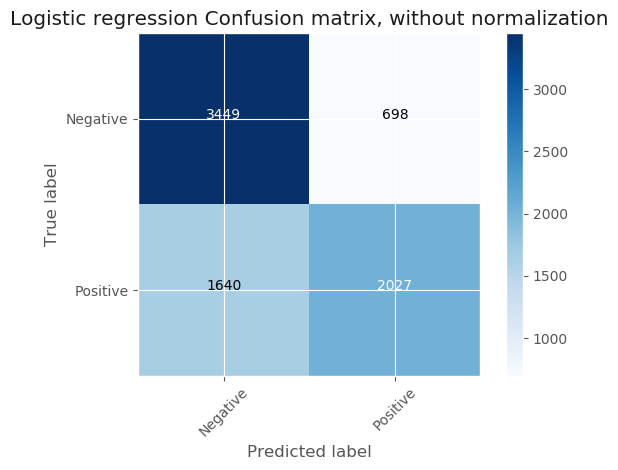

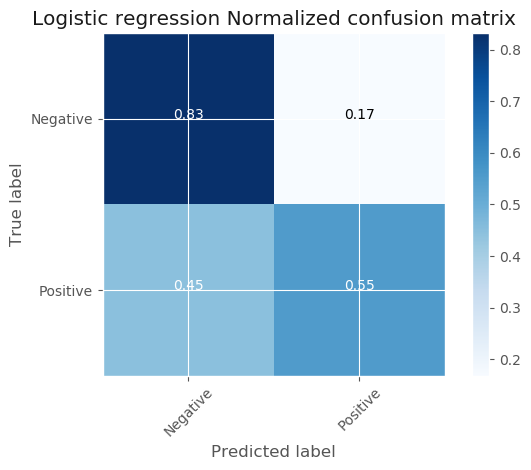

In [67]:
class_names = ['Negative','Positive']
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(confusion_matrix_logreg, classes=class_names,
                      title='Logistic regression Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix_logreg, classes=class_names, normalize=True,
                      title='Logistic regression Normalized confusion matrix')

plt.show()

#### Precision, recall, F-measure and support

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logreg))

             precision    recall  f1-score   support

          0       0.68      0.83      0.75      4147
          1       0.74      0.55      0.63      3667

avg / total       0.71      0.70      0.69      7814



#### ROC curve

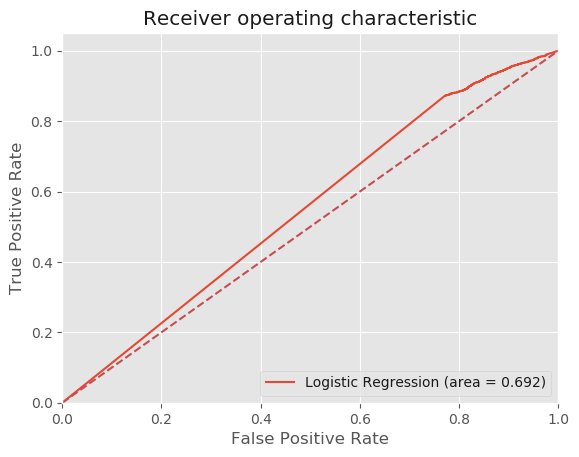

In [69]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred_logreg)
fpr, tpr, thresholds = roc_curve(y_test, clf_logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Radial Support Vector Machine model

In [70]:
clf_svmr=classifiers[2]
model_svmr=clf_svmr.fit(x_trn_n,y_train)
y_pred_svmr=model_svmr.predict(x_tst_n)
acc2=float((y_pred_svmr==y_test).sum())/float(len(y_test))
print("Support Vector Machine accuracy: {0:.3f}%".format(acc2)) 

Support Vector Machine accuracy: 0.719%


#### Confusion matrix of the Radial SVM

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix_svmr = confusion_matrix(y_test, y_pred_svmr)
print(confusion_matrix_svmr)

[[3566  581]
 [1616 2051]]


Confusion matrix, without normalization
[[3566  581]
 [1616 2051]]
Normalized confusion matrix
[[0.86 0.14]
 [0.44 0.56]]


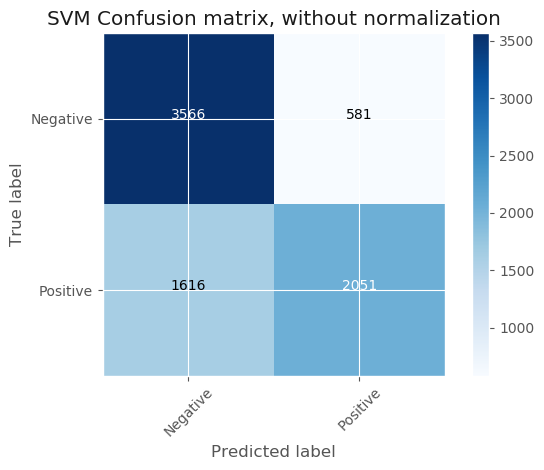

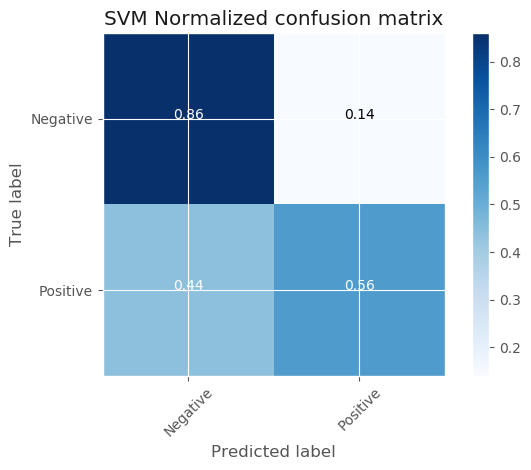

In [72]:
class_names = ['Negative','Positive']
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(confusion_matrix_svmr, classes=class_names,
                      title='SVM Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix_svmr, classes=class_names, normalize=True,
                      title='SVM Normalized confusion matrix')

plt.show()

In [73]:
#### Precision, recall, F-measure and support

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svmr))

             precision    recall  f1-score   support

          0       0.69      0.86      0.76      4147
          1       0.78      0.56      0.65      3667

avg / total       0.73      0.72      0.71      7814



### Decision Tree model

In [75]:
clf_tree=classifiers[3]
model_tree=clf_tree.fit(x_trn_n,y_train)
y_pred_tree=model_tree.predict(x_tst_n)
acc2=float((y_pred_tree==y_test).sum())/float(len(y_test))
print("Decision Tree accuracy: {0:.3f}%".format(acc2)) 

Decision Tree accuracy: 0.677%


#### Confusion matrix of the decision tree

In [76]:
confusion_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print(confusion_matrix_tree)

[[3127 1020]
 [1501 2166]]


Confusion matrix, without normalization
[[3127 1020]
 [1501 2166]]
Normalized confusion matrix
[[0.75 0.25]
 [0.41 0.59]]


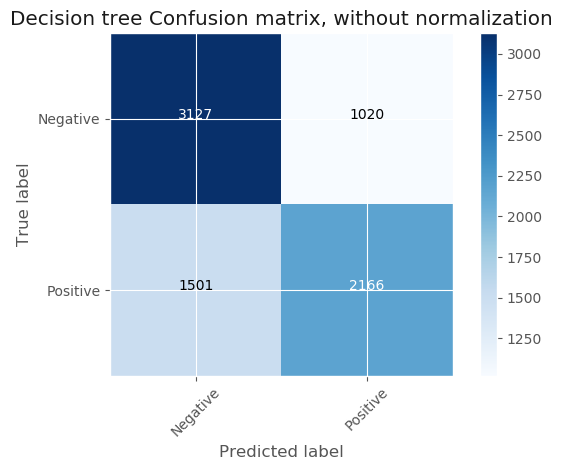

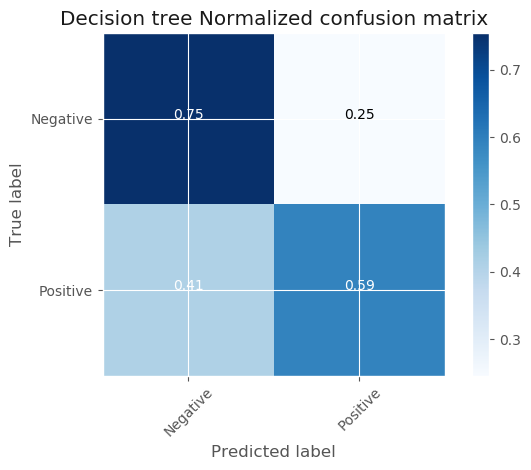

In [77]:
class_names = ['Negative','Positive']
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(confusion_matrix_tree, classes=class_names,
                      title='Decision tree Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix_tree, classes=class_names, normalize=True,
                      title='Decision tree Normalized confusion matrix')

plt.show()

### Random Forest model 

In [78]:
clf_rf=classifiers[4]
model_rf=clf_rf.fit(x_trn_n,y_train)
y_pred_rf=model_rf.predict(x_tst_n)
acc2=float((y_pred_tree==y_test).sum())/float(len(y_test))
print("Random Forest accuracy: {0:.3f}%".format(acc2)) 

Random Forest accuracy: 0.677%


#### Confusion matrix of the Random Forest

In [79]:
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(confusion_matrix_rf)

[[3442  705]
 [1851 1816]]


Confusion matrix, without normalization
[[3442  705]
 [1851 1816]]
Normalized confusion matrix
[[0.83 0.17]
 [0.5  0.5 ]]


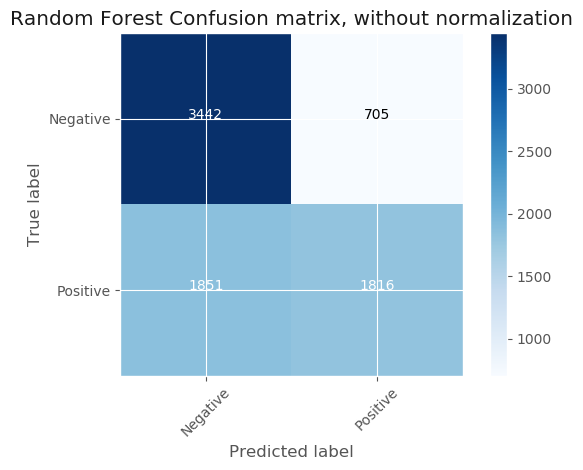

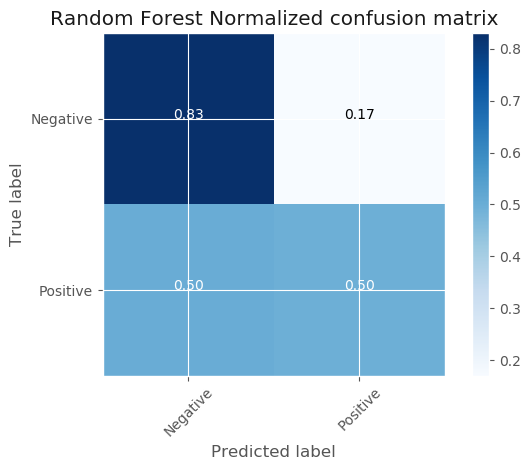

In [80]:
class_names = ['Negative','Positive']
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(confusion_matrix_rf, classes=class_names,
                      title='Random Forest Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix_rf, classes=class_names, normalize=True,
                      title='Random Forest Normalized confusion matrix')

plt.show()

## Models evaluation and conclusion

The Support Vector Machine model is the one which gives us the highest accuracy in our prediction therefore this is the one recommended for implementation.

___


###  References

1. Term deposit. https://www.investopedia.com/terms/t/termdeposit.asp
2. Kbest selection. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
3. RFE. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE
4. Logistic regression. https://en.wikipedia.org/wiki/Logistic_regression

___


###  Data source
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014